In [221]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from pandas.core.interchange.dataframe_protocol import DataFrame
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import CategoricalNB
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.preprocessing import MinMaxScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import f1_score

In [222]:
titanic = pd.read_csv('https://peter.butka.website.tuke.sk/test/titanic2.csv')

In [223]:
titanic.head()

,pclass,survived,sex,age,sibsp,parch,ticket,fare,cabin,embarked,family,has_family,fare_ordinal,title,title_short,age_ordinal,deck
0,1,1,female,29.00,0,0,24160,211.3375,B5,Southampton,0,False,most expensive,Miss,Miss,adult,B
1,1,1,male,0.92,1,2,113781,151.5500,C22 C26,Southampton,3,True,most expensive,Master,rare title,child,C
2,1,0,female,2.00,1,2,113781,151.5500,C22 C26,Southampton,3,True,most expensive,Miss,Miss,child,C
3,1,0,male,30.00,1,2,113781,151.5500,C22 C26,Southampton,3,True,most expensive,Mr,Mr,adult,C
4,1,0,female,25.00,1,2,113781,151.5500,C22 C26,Southampton,3,True,most expensive,Mrs,Mrs,adult,C


In [224]:
titanic.dtypes

pclass            int64
survived          int64
sex              object
age             float64
sibsp             int64
parch             int64
ticket           object
fare            float64
cabin            object
embarked         object
family            int64
has_family         bool
fare_ordinal     object
title            object
title_short      object
age_ordinal      object
deck             object
dtype: object

In [225]:
titanic['sex'] = titanic['sex'].astype('category')
titanic['ticket'] = titanic['ticket'].astype('category')
titanic['cabin'] = titanic['cabin'].astype('category')
titanic['embarked'] = titanic['embarked'].astype('category')
titanic['fare_ordinal'] = titanic['fare_ordinal'].astype('category')
titanic['title'] = titanic['title'].astype('category')
titanic['title_short'] = titanic['title_short'].astype('category')
titanic['age_ordinal'] = titanic['age_ordinal'].astype('category')
titanic['deck'] = titanic['deck'].astype('category')

<Axes: xlabel='embarked', ylabel='count'>

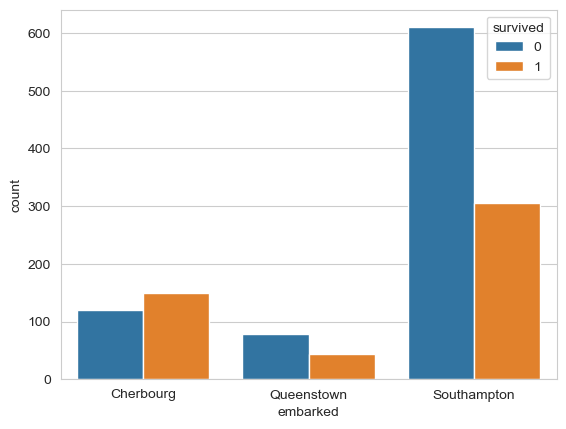

In [226]:
sns.countplot(data=titanic, x='embarked', hue='survived')

In [227]:
titanic1 = titanic.copy()

<Axes: xlabel='age_ordinal', ylabel='count'>

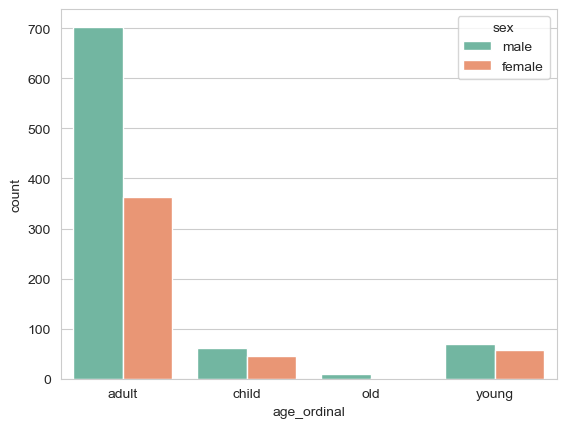

In [228]:
sns.countplot(data=titanic, x='age_ordinal', hue='sex', hue_order=['male', 'female'],
              palette='Set2')

In [229]:
train, test = train_test_split(titanic1, train_size=0.9)

In [230]:
X_train = train[['pclass', 'fare_ordinal', 'age_ordinal', 'sex']]
Y_train = train['survived']
X_test = test[['pclass', 'fare_ordinal', 'age_ordinal', 'sex']]
Y_test = test['survived']

# Kódovanie pohlavia
X_train = pd.get_dummies(X_train)
X_test = pd.get_dummies(X_test)

In [231]:

model = CategoricalNB()
model.fit(X_train, Y_train)

CategoricalNB()

In [232]:


Y_pred = model.predict(X_test)

print(classification_report(Y_test, Y_pred))
print(confusion_matrix(Y_test, Y_pred))

              precision    recall  f1-score   support

           0       0.84      0.84      0.84        82
           1       0.73      0.73      0.73        49

    accuracy                           0.80       131
   macro avg       0.79      0.79      0.79       131
weighted avg       0.80      0.80      0.80       131

[[69 13]
 [13 36]]


In [233]:
titanic2 = titanic.copy()

<Axes: xlabel='survived', ylabel='count'>

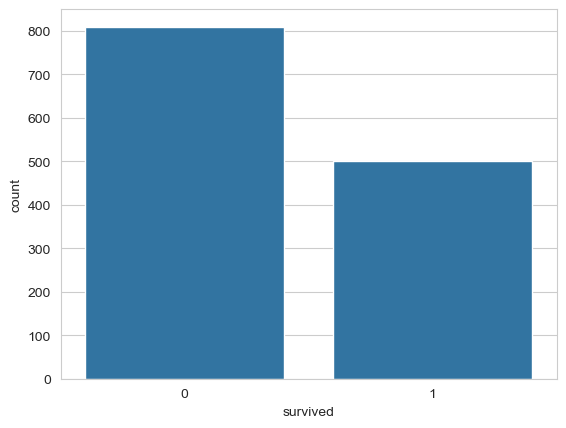

In [234]:
sns.countplot(data=titanic2, x='survived')


In [235]:

# Inicializácia MinMaxScaler pre každý atribút s požadovanými intervalmi
scaler_fare = MinMaxScaler(feature_range=(0, 1))
scaler_family = MinMaxScaler(feature_range=(0, 3))
scaler_age = MinMaxScaler(feature_range=(0, 10))

# Normalizácia atribútov
titanic2['fare_normalized'] = scaler_fare.fit_transform(titanic2[['fare']])
titanic2['family_normalized'] = scaler_family.fit_transform(titanic2[['family']])
titanic2['age_normalized'] = scaler_age.fit_transform(titanic2[['age']])

In [236]:
print(titanic2['fare_normalized'])

0       0.412503
1       0.295806
2       0.295806
3       0.295806
4       0.295806
          ...   
1304    0.028213
1305    0.028213
1306    0.014102
1307    0.014102
1308    0.015371
Name: fare_normalized, Length: 1309, dtype: float64


In [237]:
print(titanic2['age_normalized'].unique())

[ 3.61142428  0.09394964  0.22923713  3.73669047  3.11035951  5.9914819
  7.87047476  4.86408618  6.61781285  8.87260428  5.86621571  2.23349618
  2.98509332  3.2356257  10.          6.24201428  3.98722285  4.48828761
  4.6135538   5.23988476  2.35876237  4.36302142  3.48615809  5.61568333
  4.98935237  7.24414381  2.73456094  5.11461856  1.10610046  5.49041714
  7.36941     7.49467619  4.11248904  2.10822999  1.35663284  1.73243142
  6.11674809  9.49893524  5.74094952  3.3608919   7.99574095  6.86834523
  8.74733809  4.73881999  6.36728047  3.86195666  0.47976951  6.74307904
  2.85982713  5.36515095  6.49254666  1.9829638   4.04985594  2.60929475
  1.85769761  8.12100714  3.54879118  5.67831642  6.99361142  1.60716523
  7.61994238  4.23775523  0.73030189  7.11887761  7.74520857  8.37153952
  0.10397094  1.48189904  2.48402856  0.08267569  0.98083427  0.0626331
  0.85556808  0.35450332  4.55092071  2.29612927  0.6050357   8.24627333
  0.07265439  8.80997119  2.79719404  0.02004259  0. 

In [238]:
print(titanic2['family_normalized'].unique())

[0.  0.9 0.3 0.6 1.5 1.2 1.8 2.1 3. ]


In [239]:
train, test = train_test_split(titanic2, train_size=0.7)

In [240]:


Xtrain = train[['fare_normalized', 'family_normalized', 'age_normalized']]
ytrain = train['survived']

Xtest = test[['fare_normalized', 'family_normalized', 'age_normalized']]
ytest = test['survived']

neigh1 = KNeighborsClassifier(n_neighbors=1)
neigh1.fit(Xtrain, ytrain)

neigh3 = KNeighborsClassifier(n_neighbors=3)
neigh3.fit(Xtrain, ytrain)

neigh5 = KNeighborsClassifier(n_neighbors=5)
neigh5.fit(Xtrain, ytrain)

neigh7 = KNeighborsClassifier(n_neighbors=7)
neigh7.fit(Xtrain, ytrain)

neigh9 = KNeighborsClassifier(n_neighbors=9)
neigh9.fit(Xtrain, ytrain)

ypred1 = neigh1.predict(Xtest)
ypred3 = neigh3.predict(Xtest)
ypred5 = neigh5.predict(Xtest)
ypred7 = neigh7.predict(Xtest)
ypred9 = neigh9.predict(Xtest)

In [241]:


print(f1_score(ytest, ypred1))
print(f1_score(ytest, ypred3))
print(f1_score(ytest, ypred5))
print(f1_score(ytest, ypred7))
print(f1_score(ytest, ypred9))

0.4652777777777778
0.44680851063829785
0.40892193308550184
0.39846743295019155
0.46441947565543074


<Axes: >

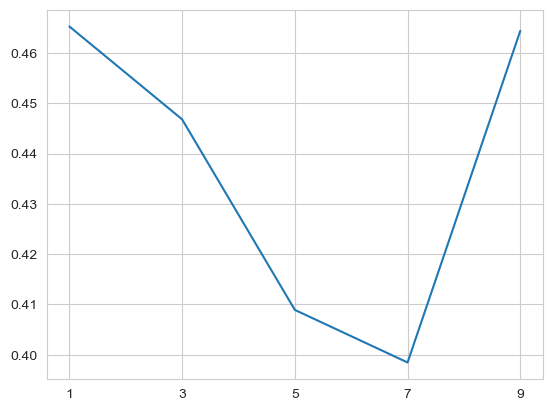

In [242]:
sns.lineplot(x=('1','3','5','7','9'), y=(f1_score(ytest, ypred1), f1_score(ytest, ypred3), f1_score(ytest, ypred5), f1_score(ytest, ypred7), f1_score(ytest, ypred9)))